# 1. Setup and Load in  Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
# read in dataset
df = pd.read_csv('reviews.csv', index_col=0)

In [3]:
df.head()
df.shape

(10140, 2)

In [4]:
# flag what the review is referencing by looking for keywords
delivery_ref = ['quick delivery','quick','fast','tracking','slow', 'delivered' , 'slow delivery', 'fast delivery', 'sent', 'received', 'delivery', 'shipping']
service_ref = ['friendly','customer service', 'rude', 'helpful', 'service', 'guidence', 'experience', 'communication', 'staff', 'satisfied']
price_ref = ['priced', 'price', 'expensive', 'cheap', 'value','sale']

# 2. Data Wrangling

In [5]:
# read through the review and if it mentions one of our keywords flag that column with a 1
def identitfy_subject(review, refs):
    flag = 0
    for ref in refs:
        if review.find(ref) != -1:
            flag = 1
    return flag

df['delivery'] = df['review'].apply(lambda x: identitfy_subject(x.lower(), delivery_ref))
df['service'] = df['review'].apply(lambda x: identitfy_subject(x.lower(), service_ref))
df['price'] = df['review'].apply(lambda x: identitfy_subject(x.lower(), price_ref))

In [6]:
# how many reviews have been flagged
print('Delivery\n',df['delivery'].sum())
print('Service\n', df['service'].sum())
print('Price\n', df['price'].sum())

Delivery
 6429
Service
 5947
Price
 2338


In [7]:
# how many columns dont have any flags
df['sum'] = df['delivery'] + df['service'] + df['price']
df[df['sum'] == 0].shape

(1068, 6)

# 3. Preprocess

In [8]:
# import stopwords
import nltk
from nltk.corpus import stopwords

# import textblob
from textblob import Word, TextBlob

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
nltk.download('omw-1.4')

# remove the store name from the reviews
custom_stopwords = ['Better Music']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tberv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tberv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tberv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
def preprocess_reviews(review, custom_stopwords):
    preprocessed_review = review
    # remove following punctuation
    preprocessed_review.replace('[^\w\s]', '')
    # return a word from the review only its not a stopword or custom stopword
    preprocessed_review = ' '.join(word for word in preprocessed_review.split() if word not in stop_words)
    preprocessed_review = ' '.join(word for word in preprocessed_review.split() if word not in custom_stopwords)
    # lemmatize words/ reduce to base form
    preprocessed_review = ' '.join(Word(word).lemmatize() for word in preprocessed_review.split())
    # return preprocessed review
    return preprocessed_review

df['Processed Review'] = df['review'].apply(lambda x: preprocess_reviews(x, custom_stopwords))

In [11]:
df

,date,review,delivery,service,price,sum,Processed Review
rating,,,,,,,
5,2022-03-10T00:18:58.000Z,3rd time I have bought a guitar from…\r\n3rd t...,1,1,0,2,3rd time I bought guitar from… 3rd time I boug...
5,2022-02-18T05:53:20.000Z,Great service as per usual,0,1,0,1,Great service per usual
5,2022-02-18T02:24:35.000Z,"Good service\r\nGood service, and guidance for...",0,1,0,1,"Good service Good service, guidance choosing c..."
5,2022-02-18T01:24:05.000Z,Speedy delivery\r\nSpeedy delivery - great to ...,1,0,0,1,Speedy delivery Speedy delivery - great buy
5,2022-02-18T01:07:07.000Z,Great online service and very fast…\r\nGreat o...,1,1,0,2,Great online service fast… Great online servic...
...,...,...,...,...,...,...,...
5,2016-03-15T06:03:26.000Z,Guitar purchase.\r\nI recently purchased an Ib...,1,1,1,3,Guitar purchase. I recently purchased Ibanez n...
5,2016-03-15T06:02:16.000Z,Early delivery. Friendly and helpful customer ...,1,1,1,3,Early delivery. Friendly helpful customer serv...
5,2016-03-15T06:00:34.000Z,Nice customer service. Fast delivery\r\nPerfec...,1,1,0,2,Nice customer service. Fast delivery Perfect. ...


# 4. Calculate Sentiment

We will calculate 2 values: Polarity and Subjectivity.

Polarity will measure how positive or negative the review is. (range -1 to 1, -1 = negative and 1 = positive)

Subjectivity will measure how objective or subjective the review is. (range from 0 - 1, 0 = subjective and 1 = objective)

---

In [12]:
# turn our review into textblob object and extract polarity (first value returned) and subjectivity (second value returned)
df['polarity'] = df['Processed Review'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Review'].apply(lambda x: TextBlob(x).sentiment[1])

In [13]:
df.head()

,date,review,delivery,service,price,sum,Processed Review,polarity,subjectivity
rating,,,,,,,,,
5,2022-03-10T00:18:58.000Z,3rd time I have bought a guitar from…\r\n3rd t...,1,1,0,2,3rd time I bought guitar from… 3rd time I boug...,0.360,0.38
5,2022-02-18T05:53:20.000Z,Great service as per usual,0,1,0,1,Great service per usual,0.275,0.50
5,2022-02-18T02:24:35.000Z,"Good service\r\nGood service, and guidance for...",0,1,0,1,"Good service Good service, guidance choosing c...",0.700,0.60
5,2022-02-18T01:24:05.000Z,Speedy delivery\r\nSpeedy delivery - great to ...,1,0,0,1,Speedy delivery Speedy delivery - great buy,0.800,0.75
5,2022-02-18T01:07:07.000Z,Great online service and very fast…\r\nGreat o...,1,1,0,2,Great online service fast… Great online servic...,0.600,0.70


In [14]:
df[['polarity', 'subjectivity']].agg([np.mean, np.min,np.median, np.max])

,polarity,subjectivity
mean,0.492506,0.623760
amin,-1.000000,0.000000
median,0.500000,0.628571
amax,1.000000,1.000000


In [15]:
df1 = df[['date', 'polarity']].copy()
df1['date'] = pd.to_datetime(df1['date']).dt.to_period('Q')
df1 = df1.groupby('date').mean().reset_index()

C:\Users\tberv\AppData\Local\Temp\ipykernel_24752\1821461629.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df1['date'] = pd.to_datetime(df1['date']).dt.to_period('Q')


In [16]:
df1 = df1.groupby('date').mean().reset_index()

--- 

**With a polarity of 0.5, the reviews lean more towards positive and subjectivity of 0.63 the reviews lean closer to being more objective.**


# 5. Visualise

In [17]:
# Create rolling moving average that takes into account the previous 10 records
df1['MA Polarity'] = df1['polarity'].rolling(3).mean()
df1

,date,polarity,MA Polarity
0,2016Q1,0.552747,NaN
1,2016Q2,0.465102,NaN
2,2016Q3,0.495224,0.504358
3,2016Q4,0.484280,0.481535
4,2017Q1,0.488013,0.489172
5,2017Q2,0.471463,0.481252
6,2017Q3,0.509950,0.489809
7,2017Q4,0.491122,0.490845
8,2018Q1,0.506731,0.502601
9,2018Q2,0.502401,0.500085


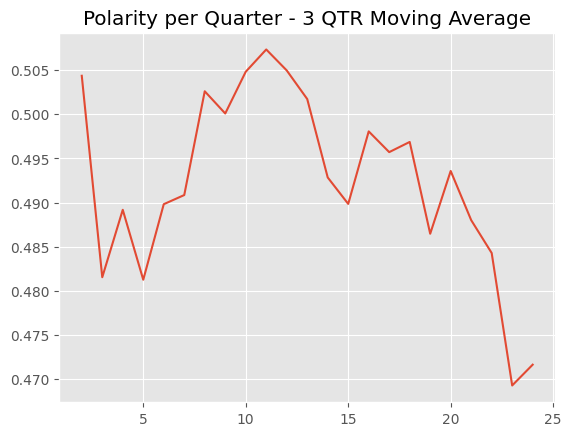

In [18]:
# Plot overall Polarity
df1.set_index('date')
df1['MA Polarity'].plot()
plt.title('Polarity per Quarter - 3 QTR Moving Average')
plt.show()


In [19]:
# Create moving average for rows within reference groups

# Delivery reference
df_delivery = df[df['delivery']==1][['date','polarity']]
df_delivery['MA'] = df_delivery['polarity'].rolling(3).mean()
df_delivery['date'] = pd.to_datetime(df_delivery['date']).dt.to_period('Q')
df_delivery = df_delivery.groupby('date').mean().reset_index()
df_delivery = df_delivery.set_index('date')

# Service reference
df_service = df[df['service']==1][['date','polarity']]
df_service['MA'] = df_service['polarity'].rolling(3).mean()
df_service['date'] = pd.to_datetime(df_service['date']).dt.to_period('Q')
df_service = df_service.groupby('date').mean().reset_index()
df_service = df_service.set_index('date')

# Price reference
df_price = df[df['price']==1][['date','polarity']]
df_price['MA'] = df_price['polarity'].rolling(3).mean()
df_price['date'] = pd.to_datetime(df_price['date']).dt.to_period('Q')
df_price = df_price.groupby('date').mean().reset_index()
df_price = df_price.set_index('date')


C:\Users\tberv\AppData\Local\Temp\ipykernel_24752\2944337161.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_delivery['date'] = pd.to_datetime(df_delivery['date']).dt.to_period('Q')
C:\Users\tberv\AppData\Local\Temp\ipykernel_24752\2944337161.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_service['date'] = pd.to_datetime(df_service['date']).dt.to_period('Q')
C:\Users\tberv\AppData\Local\Temp\ipykernel_24752\2944337161.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_price['date'] = pd.to_datetime(df_price['date']).dt.to_period('Q')


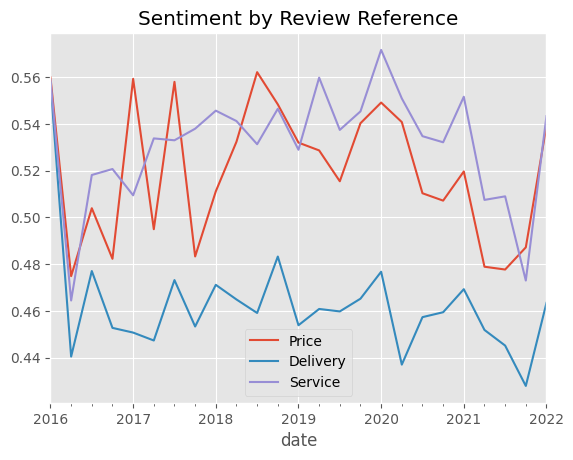

In [20]:
df_price['MA'].plot(label = 'Price')
df_delivery['MA'].plot(label = 'Delivery')
df_service['MA'].plot(label = 'Service')

plt.legend()
plt.title('Sentiment by Review Reference')
plt.show()

Note that dataset for reference groups is unbalanced as seen earlier with Delivery having triple the amount of reviews than Price.
The date column is group in Qtr bins which are also unbalanced.


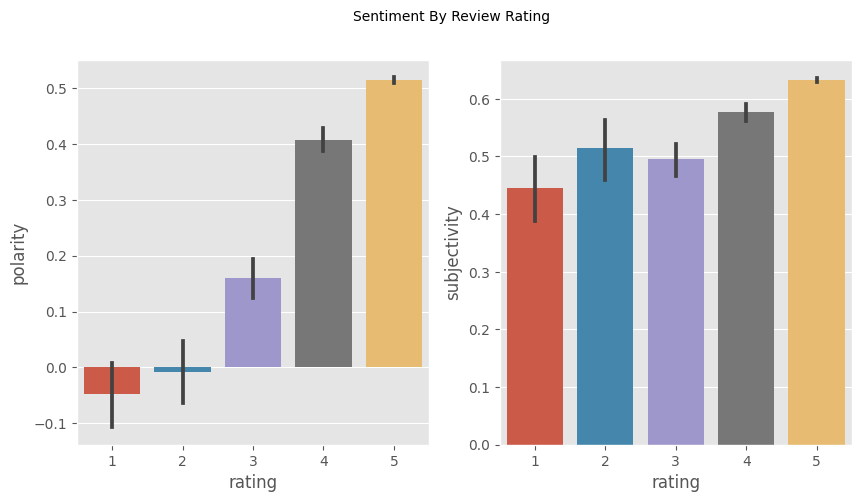

In [26]:
fig, axs = plt.subplots(1,2, figsize = (10,5))

df = df.reset_index()
sns.barplot(data=df, x='rating', y='polarity', ax=axs[0])
sns.barplot(data=df, x='rating', y='subjectivity', ax=axs[1])


fig.suptitle('Sentiment By Review Rating', fontsize=10)

plt.show()

**As we would expect the more positive the polarity the higher the rating.**

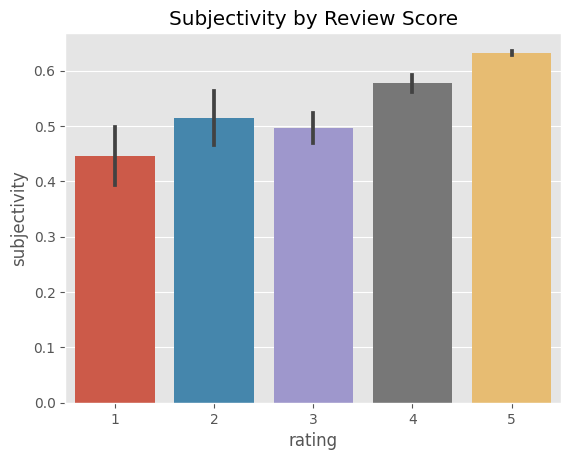

In [27]:
ax1 = sns.barplot(data = df, x = 'rating', y = 'subjectivity')
plt.title('Subjectivity by Review Score')
plt.show()

**Subjectivity shows less of a pattern but slightly more objective reviews reflect higher ratings.**